[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shhommychonx/VCTK/blob/main/jupyternotebooks/EDA/speaker_info.ipynb)

In [3]:
# !wget https://datashare.ed.ac.uk/bitstream/handle/10283/3443/VCTK-Corpus-0.92.zip?sequence=2&isAllowed=y
# !unzip -qq VCTK-Corpus-0.92.zip

# takes over two hours

--2022-07-12 06:19:00--  https://datashare.ed.ac.uk/bitstream/handle/10283/3443/VCTK-Corpus-0.92.zip?sequence=2
Resolving datashare.ed.ac.uk (datashare.ed.ac.uk)... 192.41.117.26
Connecting to datashare.ed.ac.uk (datashare.ed.ac.uk)|192.41.117.26|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: 11747302977 (11G) [application/zip]
Saving to: ‘VCTK-Corpus-0.92.zip?sequence=2.1’

ip?sequence=2.1       0%[                    ]   8.44M  1.40MB/s    eta 2h 17m 

KeyboardInterrupt: ignored

In [12]:
# visit https://www.kaggle.com/datasets/showmik50/vctk-dataset?resource=download for required txt file
# and upload to colab.

import pandas as pd

df = pd.DataFrame(columns=[ _ for _ in range(5) ])

with open("/content/speaker-info.txt", 'r') as txt_file:
    line = txt_file.readline()
    colnames = [ colname for colname in line.split() if len(colname) ]

    line = txt_file.readline()
    while line:
        elements = [ element for element in line.split() if len(element) ]
        _id, age, gender, accents, region = \
            elements[0], elements[1], elements[2], elements[3], ' '.join(elements[4:])
        df = df.append(pd.Series([_id, age, gender, accents, region]), ignore_index=True)
        line = txt_file.readline()
    
    df.columns = colnames

df["ID"] = df["ID"].astype(int)
df["AGE"] = df["AGE"].astype(int)

df.head()

,ID,AGE,GENDER,ACCENTS,REGION
0,225,23,F,English,Southern England
1,226,22,M,English,Surrey
2,227,38,M,English,Cumbria
3,228,22,F,English,Southern England
4,229,23,F,English,Southern England


In [13]:
len(df) # 

108

In [15]:
df["AGE"].describe()

count    108.000000
mean      22.666667
std        3.013986
min       18.000000
25%       21.000000
50%       22.000000
75%       23.000000
max       38.000000
Name: AGE, dtype: float64


['F' 'M']


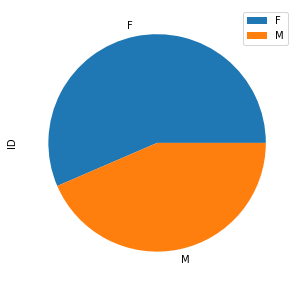

In [21]:
display(df.groupby(["GENDER"])[["ID"]].count().plot.pie(y="ID", figsize=(5,5)))
print()
print(df["GENDER"].unique())


['English' 'Scottish' 'NorthernIrish' 'Irish' 'Indian' 'Welsh' 'American'
 'Canadian' 'SouthAfrican' 'Australian' 'NewZealand']


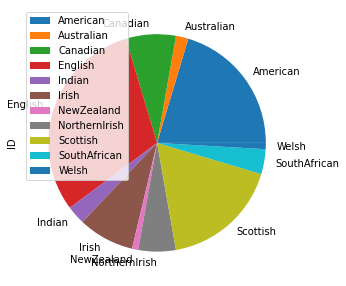

In [24]:
display(df.groupby(["ACCENTS"])[["ID"]].count().plot.pie(y="ID", figsize=(15,5)))
print()
print(df["ACCENTS"].unique())


['Southern England' 'Surrey' 'Cumbria' 'Stockton-on-tees' 'Staffordshire'
 'West Dumfries' 'Manchester' 'Fife' 'Belfast' 'SW England' 'Perth'
 'London' 'Dublin' 'Selkirk' 'Argyll' '' 'Aberdeen' 'SE England'
 'Edinburgh' 'Cardiff' 'Galloway' 'Birmingham' 'Nottingham' 'Orkney'
 'West Lothian' 'Ross' 'Athlone' 'Yorkshire' 'Newcastle' 'Suffolk' 'Essex'
 'Midlothian' 'Oxford' 'NE England' 'Cheshire' 'Leicester' 'Cork' 'York'
 'San Francisco' 'New York' 'Tipperary' 'California' 'North Carolina'
 'Montreal' 'Toronto' 'Philadelphia' 'Ontario' 'Alabama' 'Tennessee'
 'Iowa' 'Hamilton' 'County Down' 'Cape Town' 'New England' 'Alberta'
 'Napa' 'Pretoria' 'English Sydney' 'Indiana' 'Chicago' 'English'
 'Johannesburg' 'Pennsylvania' 'Ohio' 'Florida' 'Derry' 'New Jersey'
 'Donegal']


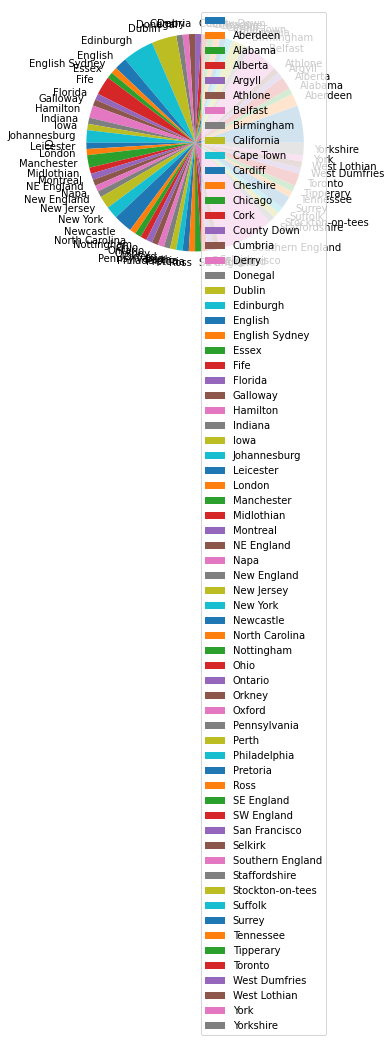

In [25]:
display(df.groupby(["REGION"])[["ID"]].count().plot.pie(y="ID", figsize=(15,5)))
print()
print(df["REGION"].unique())

In [27]:
accent_map = {
    'American': "미국",
    'Canadian': "캐나다",
    'English': "영국",
    'Scottish': "스코틀랜드",
    'Welsh': "웨일스",
    'NorthernIrish': "북아일랜드",
    'Irish': "아일랜드",
    'Indian': "인도",
    'SouthAfrican': "남아프리카",
    'Australian': "호주",
    'NewZealand': "뉴질랜드"
}

json_dict = dict()
json_dict["en"] = dict()

json_dict["en"]["전체"] = list()
for k, v in accent_map.items():
    json_dict["en"][v] = list()

In [30]:
for _, row in df.iterrows():
    accent_type = accent_map[row["ACCENTS"]]
    json_dict["en"]["전체"].append(f"vctk_p{row['ID']}-neutral")
    json_dict["en"][accent_type].append(f"vctk_p{row['ID']}-neutral")

In [33]:
json_dict["en"].keys()

dict_keys(['전체', '미국', '캐나다', '영국', '스코틀랜드', '웨일스', '북아일랜드', '아일랜드', '인도', '남아프리카', '호주', '뉴질랜드'])